In [15]:
from google.colab import files
files.upload()


Saving kaggle (5).json to kaggle (5).json


{'kaggle (5).json': b'{"username":"paripatni","key":"0a110826fde49d16d13abeb098862940"}'}

In [16]:

!mkdir -p ~/.kaggle
!mv "kaggle (4).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [17]:
!pip install -q kaggle


In [18]:
# Download the dataset from Kaggle
!kaggle datasets download -d gti-upm/leapgestrecog


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.13G/2.13G [00:25<00:00, 64.7MB/s]
100% 2.13G/2.13G [00:25<00:00, 89.0MB/s]


In [19]:
# Unzip the dataset into a folder
import zipfile
import os

# Create folder if it doesn't exist
os.makedirs("leapGestRecog", exist_ok=True)

# Unzip
with zipfile.ZipFile("leapgestrecog.zip", "r") as zip_ref:
    zip_ref.extractall("leapGestRecog")

# Check the folder structure
os.listdir("leapGestRecog")


['leapgestrecog', 'leapGestRecog']

In [20]:
import os

# Path to dataset
dataset_path = "leapGestRecog/leapgestrecog"

# List all user folders
users = sorted(os.listdir(dataset_path))
print("Total Users:", len(users))
print("User Folders:", users)


Total Users: 1
User Folders: ['leapGestRecog']


In [21]:
# Inspect deeper inside the nested folder
os.listdir("leapGestRecog/leapgestrecog/leapGestRecog")


['08', '02', '03', '01', '07', '05', '04', '00', '09', '06']

In [22]:
# ✅ Correct dataset path
dataset_path = "leapGestRecog/leapgestrecog/leapGestRecog"


In [23]:
users = sorted(os.listdir(dataset_path))
print("Total Users:", len(users))
print("User Folders:", users)


Total Users: 10
User Folders: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [24]:
# Choose user '00' as example
user_0_path = os.path.join(dataset_path, '00')

# List gesture folders inside this user
gestures = sorted(os.listdir(user_0_path))
print("Total Gestures:", len(gestures))
print("Gesture Folders:", gestures)


Total Gestures: 10
Gesture Folders: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [25]:
import os

# Construct the full path to the image
sample_img_path = os.path.join("leapGestRecog", "leapgestrecog", "00", "01_palm", "frame_0001.bmp")

print("Image Path:", sample_img_path)

# Check if file exists
print("File Exists:", os.path.exists(sample_img_path))


Image Path: leapGestRecog/leapgestrecog/00/01_palm/frame_0001.bmp
File Exists: False


In [26]:
import os

for root, dirs, files in os.walk("leapGestRecog"):
    for file in files:
        if file.endswith(".bmp"):
            print(os.path.join(root, file))
            break  # Print only first image for now


In [27]:
# Level 0
print("Root folder contents:", os.listdir("leapGestRecog"))



Root folder contents: ['leapgestrecog', 'leapGestRecog']


In [28]:
# Level 1
print("Subfolder contents:", os.listdir("leapGestRecog/leapgestrecog"))


Subfolder contents: ['leapGestRecog']


In [29]:
# Level 2 — replace 'XXX' with folder name shown in previous output
print("Next level contents:", os.listdir("leapGestRecog/leapgestrecog/XXX"))


FileNotFoundError: [Errno 2] No such file or directory: 'leapGestRecog/leapgestrecog/XXX'

In [30]:
print("Final folder contents:", os.listdir("leapGestRecog/leapgestrecog/leapGestRecog"))


Final folder contents: ['08', '02', '03', '01', '07', '05', '04', '00', '09', '06']


In [31]:
print("Sample gesture folder:", os.listdir("leapGestRecog/leapgestrecog/leapGestRecog/00"))



Sample gesture folder: ['04_fist_moved', '02_l', '07_ok', '08_palm_moved', '10_down', '01_palm', '09_c', '05_thumb', '03_fist', '06_index']


In [32]:
print("Sample images:", os.listdir("leapGestRecog/leapgestrecog/leapGestRecog/00/01_palm")[:5])


Sample images: ['frame_00_01_0154.png', 'frame_00_01_0011.png', 'frame_00_01_0118.png', 'frame_00_01_0124.png', 'frame_00_01_0059.png']


File Exists: True


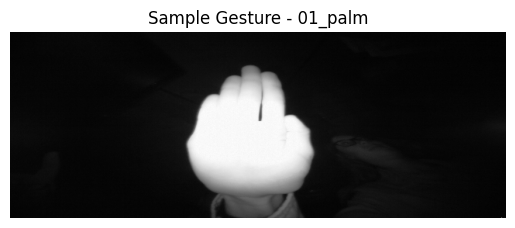

In [33]:
import cv2
import matplotlib.pyplot as plt
import os

# Updated image path
sample_img_path = "leapGestRecog/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0154.png"

# Confirm it exists
print("File Exists:", os.path.exists(sample_img_path))

# Load and display
img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)

if img is not None:
    plt.imshow(img, cmap='gray')
    plt.title("Sample Gesture - 01_palm")
    plt.axis('off')
    plt.show()
else:
    print("Image failed to load.")


In [34]:
import numpy as np
import cv2

# Set image dimensions
IMG_SIZE = 64  # You can change to 128 if needed
DATA_DIR = "leapGestRecog/leapgestrecog/leapGestRecog"


In [35]:
# Fixed order of gesture folders
gesture_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
                 '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

# Map each gesture to a numeric class
gesture_to_label = {name: idx for idx, name in enumerate(gesture_names)}
print(gesture_to_label)


{'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}


In [36]:
from tqdm import tqdm

data = []
labels = []

# Loop through all users
for user in sorted(os.listdir(DATA_DIR)):
    user_path = os.path.join(DATA_DIR, user)

    # Loop through each gesture folder
    for gesture in gesture_names:
        gesture_path = os.path.join(user_path, gesture)

        if not os.path.exists(gesture_path):
            continue  # Some folders may be missing for a user

        for img_file in os.listdir(gesture_path):
            if img_file.endswith('.png'):
                img_path = os.path.join(gesture_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append(gesture_to_label[gesture])


In [37]:
# Convert to numpy arrays and reshape
data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0  # Normalize
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (20000, 64, 64, 1)
Labels shape: (20000,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 16000
Testing samples: 4000


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [40]:
# There are 10 classes
num_classes = 10

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [41]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [43]:
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test_cat))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 327ms/step - accuracy: 0.6885 - loss: 0.9182 - val_accuracy: 0.9930 - val_loss: 0.0270
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 315ms/step - accuracy: 0.9948 - loss: 0.0241 - val_accuracy: 0.9970 - val_loss: 0.0089
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 321ms/step - accuracy: 0.9966 - loss: 0.0133 - val_accuracy: 0.9995 - val_loss: 0.0049
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 341ms/step - accuracy: 0.9976 - loss: 0.0088 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 312ms/step - accuracy: 0.9983 - loss: 0.0079 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 311ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 3.0025e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 333ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 136s 310ms/step - accuracy: 0.9988 - l

In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 1.0000 - loss: 4.7282e-05
Test Accuracy: 99.98%


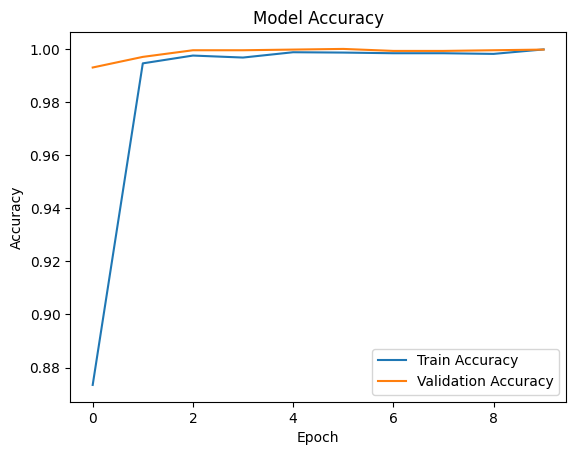

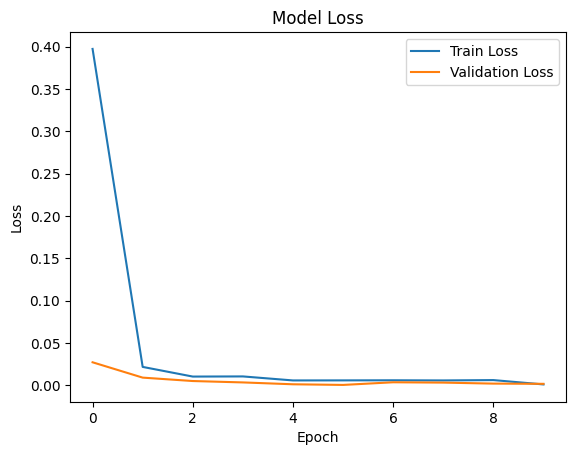

In [45]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


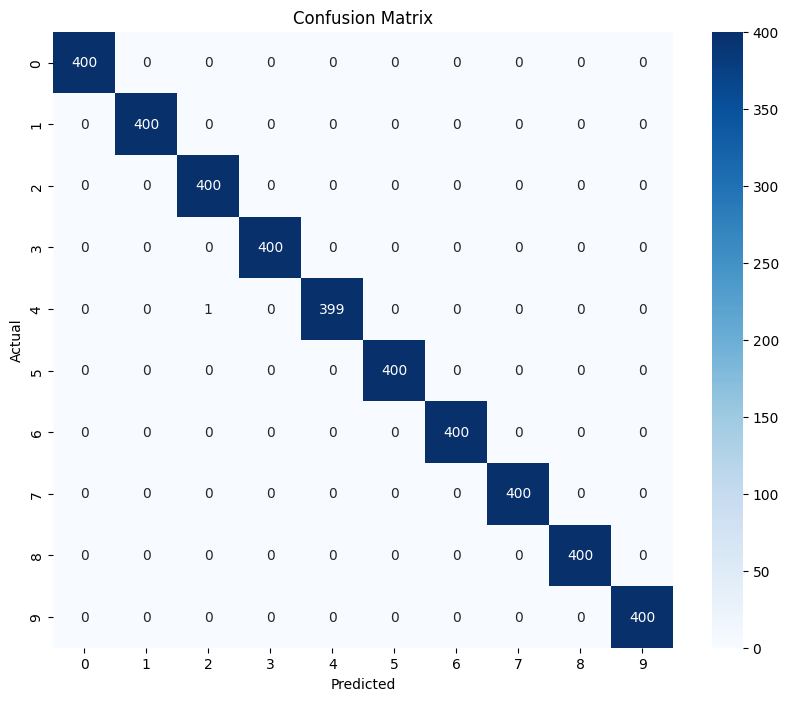

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400
           4       1.00      1.00      1.00       400
           5       1.00      1.00      1.00       400
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       400
           8       1.00      1.00      1.00       400
           9       1.00      1.00      1.00       400

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Original labels (not one-hot encoded)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


In [47]:
model.save("gesture_model.h5")


In [48]:
model.save("gesture_model.keras")


In [49]:
from google.colab import files
files.download("gesture_model.keras")  # or gesture_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("gesture_model.keras")  # or "gesture_model.h5"

# Define your class labels (adjust based on your training)
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Example


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [53]:
import os

for root, dirs, files in os.walk("leapGestRecog"):
    print(root)


leapGestRecog
leapGestRecog/leapgestrecog
leapGestRecog/leapgestrecog/leapGestRecog
leapGestRecog/leapgestrecog/leapGestRecog/08
leapGestRecog/leapgestrecog/leapGestRecog/08/04_fist_moved
leapGestRecog/leapgestrecog/leapGestRecog/08/02_l
leapGestRecog/leapgestrecog/leapGestRecog/08/07_ok
leapGestRecog/leapgestrecog/leapGestRecog/08/08_palm_moved
leapGestRecog/leapgestrecog/leapGestRecog/08/10_down
leapGestRecog/leapgestrecog/leapGestRecog/08/01_palm
leapGestRecog/leapgestrecog/leapGestRecog/08/09_c
leapGestRecog/leapgestrecog/leapGestRecog/08/05_thumb
leapGestRecog/leapgestrecog/leapGestRecog/08/03_fist
leapGestRecog/leapgestrecog/leapGestRecog/08/06_index
leapGestRecog/leapgestrecog/leapGestRecog/02
leapGestRecog/leapgestrecog/leapGestRecog/02/04_fist_moved
leapGestRecog/leapgestrecog/leapGestRecog/02/02_l
leapGestRecog/leapgestrecog/leapGestRecog/02/07_ok
leapGestRecog/leapgestrecog/leapGestRecog/02/08_palm_moved
leapGestRecog/leapgestrecog/leapGestRecog/02/10_down
leapGestRecog/leap

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


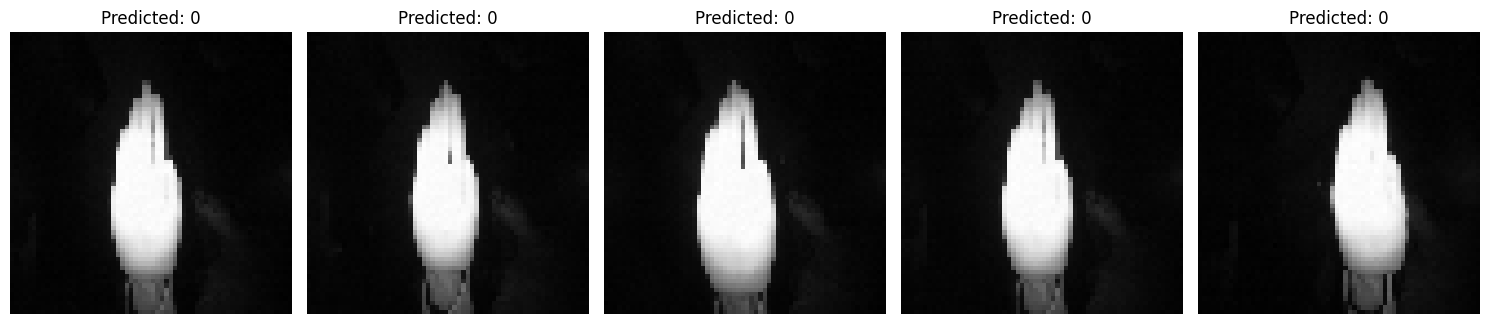

In [56]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model("gesture_model.keras")

# Use a valid image folder
test_path = "leapGestRecog/leapGestRecog/00/01_palm"

# Pick 5 random images from that folder
sample_files = random.sample(os.listdir(test_path), 5)

plt.figure(figsize=(15, 5))

for i, file_name in enumerate(sample_files):
    img_path = os.path.join(test_path, file_name)

    img = image.load_img(img_path, target_size=(64, 64), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    predicted_class = np.argmax(pred)

    # Plot the image
    plt.subplot(1, 5, i + 1)
    plt.imshow(img_array[0].squeeze(), cmap='gray')

    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


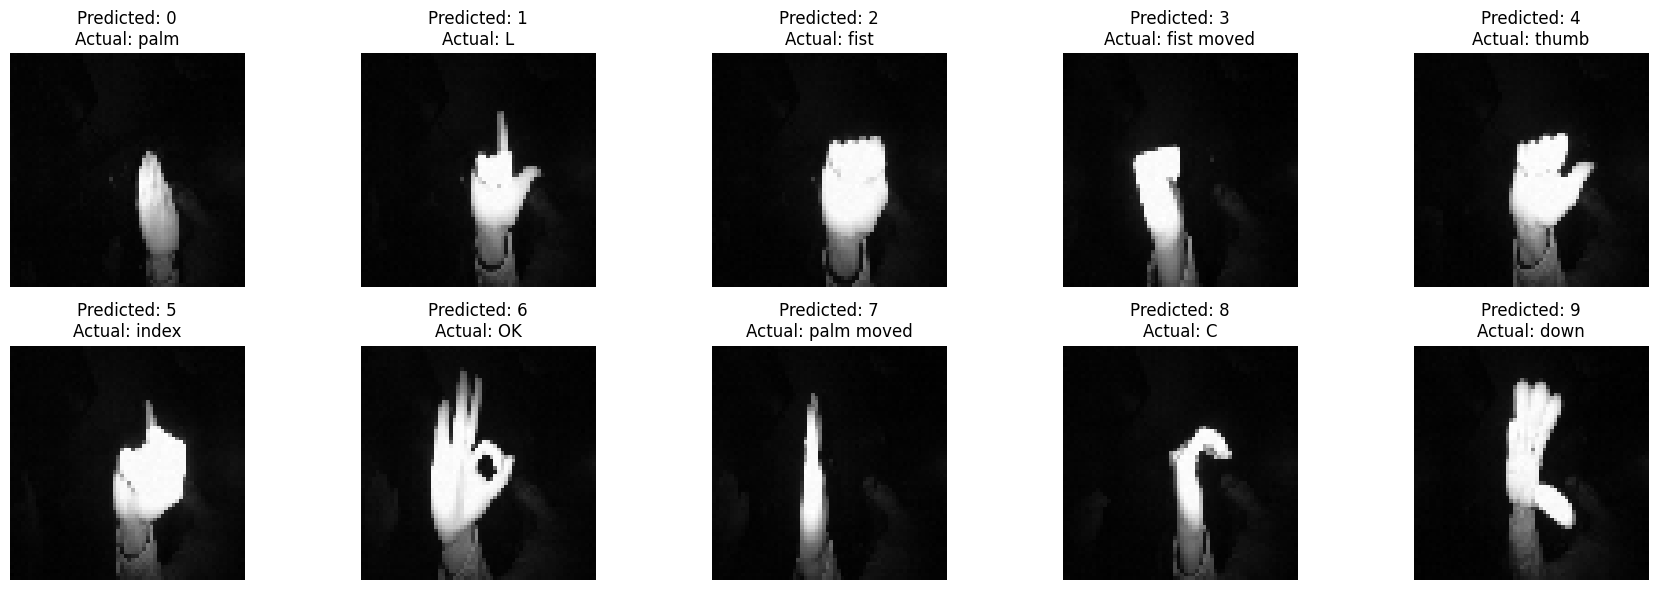

In [60]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import random

# Load model
model = load_model("gesture_model.keras")

# This is the actual folder path
base_path = "leapGestRecog/leapGestRecog/00"

# List all gesture folders in this subject
gesture_folders = sorted(os.listdir(base_path))

# Mapping from folder names to readable labels
class_names = {
    "01_palm": "palm",
    "02_l": "L",
    "03_fist": "fist",
    "04_fist_moved": "fist moved",
    "05_thumb": "thumb",
    "06_index": "index",
    "07_ok": "OK",
    "08_palm_moved": "palm moved",
    "09_c": "C",
    "10_down": "down"
}

plt.figure(figsize=(18, 6))

for i, folder in enumerate(gesture_folders[:10]):
    gesture_path = os.path.join(base_path, folder)
    if not os.path.isdir(gesture_path):
        continue

    # Pick a random image
    images = os.listdir(gesture_path)
    if not images:
        continue
    img_file = random.choice(images)
    img_path = os.path.join(gesture_path, img_file)

    # Load and predict
    img = image.load_img(img_path, target_size=(64, 64), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    predicted_class = np.argmax(pred)

    # Plot
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_array[0].squeeze(), cmap="gray")
    label = class_names.get(folder, folder)
    plt.title(f"Predicted: {predicted_class}\nActual: {label}")
    plt.axis("off")

plt.tight_layout()
plt.savefig("gesture_predictions.png")
plt.show()


In [61]:
from google.colab import files
files.download("gesture_predictions.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>